# Data Loading

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
%matplotlib inline

#model building
#import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
combined = [train, test]

alldata=pd.concat(combined, sort=True).reset_index(drop=True) #Join the dfs vertically.survived column of test is currently filled w NaNs

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
alldata.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
alldata.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# 1.Exploratory Data Analysis

# Categorical features
Categorical: Survived, Sex, and Embarked.
Ordinal: Pclass.

Numerical Features
Continous: Age, Fare.
Discrete: SibSp, Parch.

Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived

Pclass (Passenger Class) is the socio-economic status of the passenger which has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class

Embarked is port of embarkation which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

SibSp is the total number of the passengers' siblings and spouse (0 to 8)

Parch is the total number of the passengers' parents and children (0 to 6)

In [11]:
print(train.shape)
print(test.shape) #does not have survived column. we are to predict that!
print(alldata.shape)

(891, 12)
(418, 11)
(1309, 12)


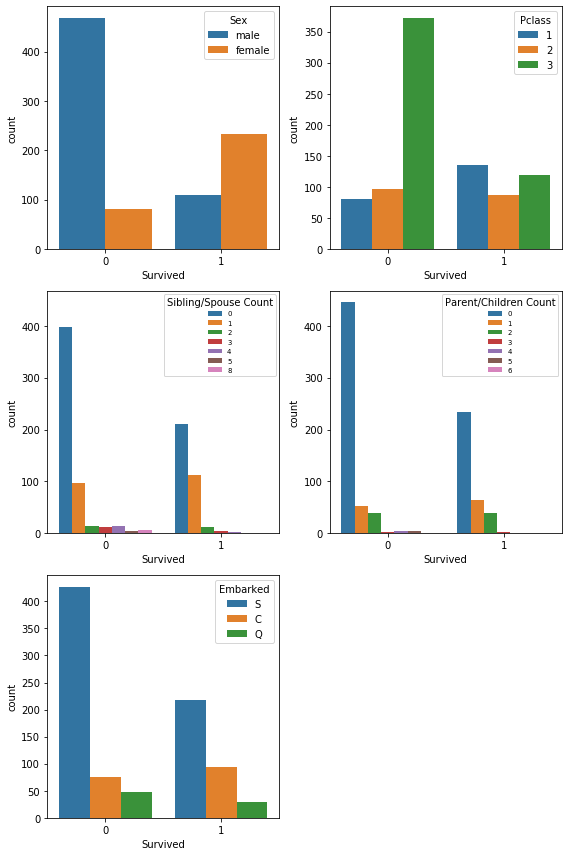

In [12]:
fig=plt.figure()
ax1=plt.subplot(321)
sns.countplot(x = 'Survived', hue = 'Sex', data = train, ax=ax1)

ax2=plt.subplot(322)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, ax=ax2)

ax3=plt.subplot(323)
sns.countplot(x = 'Survived', hue = 'SibSp', data = train, ax=ax3)
ax3.legend(loc=1, title='Sibling/Spouse Count', fontsize='x-small')

ax4=plt.subplot(324, sharey=ax3)
sns.countplot(x = 'Survived', hue = 'Parch', data = train, ax=ax4)
ax4.legend(loc=1, title='Parent/Children Count', fontsize='x-small')

ax5=plt.subplot(325)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, ax=ax5)
ax5.legend(loc=1, title='Embarked')

#ax6=plt.subplot(326)
#sns.countplot(x = 'Survived', hue = 'Cabin', data = train, ax=ax6)
#ax6.legend(loc=1, title='Cabin')

fig.set_size_inches(8,12)
fig.tight_layout()

In [13]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

# Handling Missing Values

In [16]:
print('Training Set\n')
print(train.isnull().sum())
print('-'*30)
print('Test Set\n')
print(test.isnull().sum())

Training Set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Test Set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
#correlation matrix for all features.
corr_matr=(alldata.drop('PassengerId', axis=1).corr().abs().unstack().reset_index().rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
.sort_values(by=['Feature 1','corr'], ascending=[True,False]))
corr_matr

,Feature 1,Feature 2,corr
0,Age,Age,1.000000
3,Age,Pclass,0.408106
4,Age,SibSp,0.243699
1,Age,Fare,0.178740
2,Age,Parch,0.150917
5,Age,Survived,0.077221
7,Fare,Fare,1.000000
9,Fare,Pclass,0.558629
11,Fare,Survived,0.257307
8,Fare,Parch,0.221539


In [18]:
#number of null records to fill in age column
alldata.groupby(['Sex','Embarked', 'Pclass']).size()-alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].count()

Sex     Embarked  Pclass
female  C         1          6
                  2          0
                  3          9
        Q         1          0
                  2          1
                  3         35
        S         1          5
                  2          2
                  3         20
male    C         1          7
                  2          4
                  3         32
        Q         1          0
                  2          1
                  3         36
        S         1         21
                  2          8
                  3         76
dtype: int64

In [19]:
alldata['Age'] = alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].apply( lambda x: x.fillna(x.median()) )
alldata.isnull().sum()

Age               2
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [20]:
alldata['Age'] = alldata.groupby(['Sex', 'Pclass'])['Age'].apply( lambda x: x.fillna(x.median()) )
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [21]:
alldata[alldata.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,35.5,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,35.5,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [22]:
alldata.Embarked=alldata.Embarked.fillna('S')
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [23]:
alldata[alldata.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [24]:
alldata.Fare=alldata.Fare.fillna(alldata.groupby(['Pclass', 'Parch']).median().Fare[3][0])
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [25]:
alldata=alldata.drop('Cabin', axis=1)

In [26]:
alldata.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

# Correlations

In [27]:
train_corr=(train.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
train_corr=train_corr.query('corr!=1').drop([6,12,13,18,19,24,25,26,31,33])
train_corr=train_corr.query('corr>0.1').sort_values(by='corr', ascending=False)

In [28]:
test_corr=(test.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
test_corr=test_corr.query('corr!=1').reset_index(drop=True).drop([5,10,13,18, 9,12,17, 14,16])
test_corr=test_corr.query('corr>=0.1').sort_values(by='corr', ascending=False)


In [29]:
corr=pd.merge(train_corr, test_corr, on=['Feature 1', 'Feature 2'], how='outer', suffixes=['_train', '_test'])
corr

,Feature 1,Feature 2,corr_train,corr_test
0,Pclass,Fare,0.549500,NaN
1,Parch,SibSp,0.414838,0.306895
2,SibSp,Parch,0.414838,NaN
3,Pclass,Age,0.369226,NaN
4,Survived,Pclass,0.338481,NaN
5,Age,SibSp,0.308247,NaN
6,SibSp,Age,0.308247,NaN
7,Fare,Survived,0.257307,NaN
8,Survived,Fare,0.257307,NaN
9,Fare,Parch,0.216225,0.230046


Text(0.5, 1, 'Correlation matrix for test set')

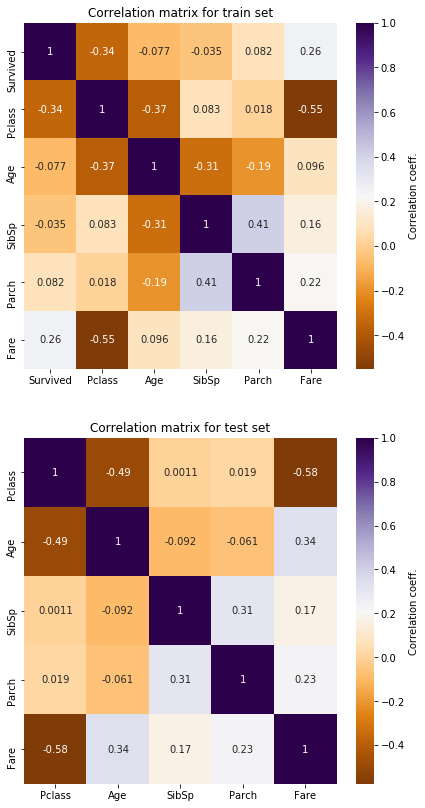

In [30]:
fig, axs=plt.subplots(2,1, figsize=(7,14))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.drop('PassengerId', axis=1).corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
axs[0].set_title('Correlation matrix for train set')
axs[1].set_title('Correlation matrix for test set')


In [31]:
alldata.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Binning Continuous Features

In [33]:
alldata['AgeBin']=pd.qcut(alldata['Age'],9)
alldata['AgeBin'].value_counts().sort_index()

(0.169, 17.0]    163
(17.0, 21.0]     136
(21.0, 24.0]     173
(24.0, 25.0]     179
(25.0, 28.0]      95
(28.0, 32.0]     135
(32.0, 39.0]     162
(39.0, 47.0]     133
(47.0, 80.0]     133
Name: AgeBin, dtype: int64

In [34]:
alldata['FareBin']=pd.qcut(alldata['Fare'],10)
alldata['FareBin'].value_counts().sort_index()

(-0.001, 7.57]      131
(7.57, 7.854]       144
(7.854, 8.05]       147
(8.05, 10.5]        108
(10.5, 14.454]      128
(14.454, 21.558]    127
(21.558, 26.82]     131
(26.82, 41.579]     134
(41.579, 78.02]     128
(78.02, 512.329]    131
Name: FareBin, dtype: int64

In [35]:
alldata.drop(['Age', 'Fare'], axis=1, inplace=True)

In [36]:
alldata.head()

,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeBin,FareBin
0,S,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(21.0, 24.0]","(-0.001, 7.57]"
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(32.0, 39.0]","(41.579, 78.02]"
2,S,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(25.0, 28.0]","(7.854, 8.05]"
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(32.0, 39.0]","(41.579, 78.02]"
4,S,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(32.0, 39.0]","(7.854, 8.05]"


# Feature Formatting

In [39]:
columns=['Embarked','Sex','AgeBin','FareBin']
for col in columns:
    alldata[col] = LabelEncoder().fit_transform(alldata[col])

In [40]:
def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[feature_to_encode], prefix=feature_to_encode)
    res = pd.concat([original_df, dummies], axis=1)
    res=res.drop(feature_to_encode, axis=1)
    return(res)  

In [41]:
columns=['Embarked']
for col in columns:
    alldata=encode_and_bind(alldata, col)  

In [43]:
drop_cols = ['Name', 'Parch', 'PassengerId','SibSp', 'Ticket']
alldata=alldata.drop(drop_cols, axis=1)

In [44]:
alldata.head()

,Pclass,Sex,Survived,AgeBin,FareBin,Embarked_0,Embarked_1,Embarked_2
0,3,1,0.0,2,0,0,0,1
1,1,0,1.0,6,8,1,0,0
2,3,0,1.0,4,2,0,0,1
3,1,0,1.0,6,8,0,0,1
4,3,1,0.0,6,2,0,0,1


In [45]:
#update train and test sets
train=alldata.iloc[:891]
test=alldata.iloc[891:].drop('Survived',axis=1)

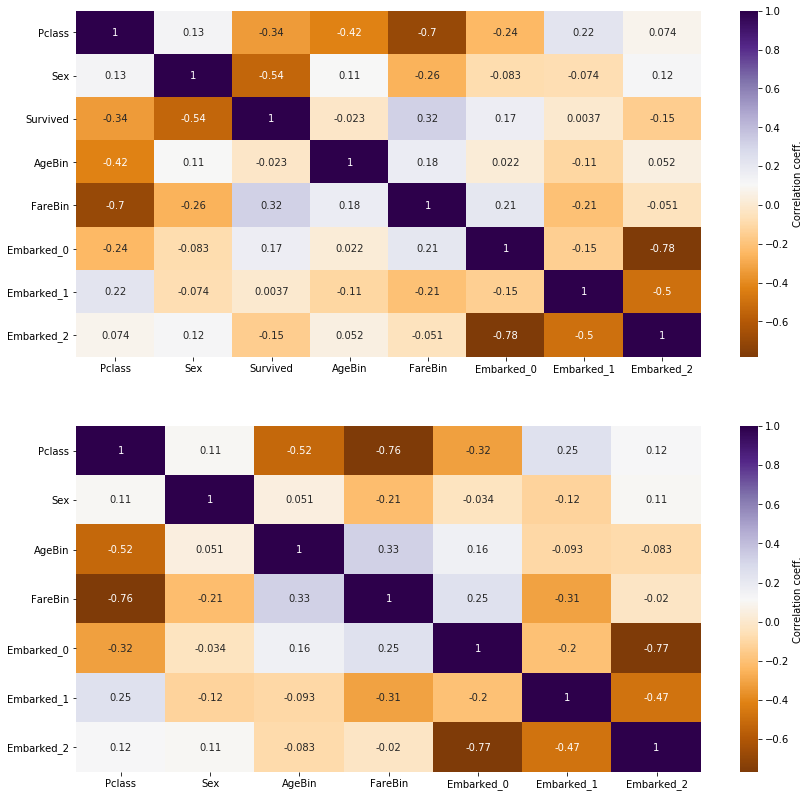

In [47]:
fig, axs=plt.subplots(2,1, figsize=(14,14))
sns.heatmap(train.corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")

# MODELLING

In [48]:
#training data
X = train.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()

In [49]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5) #%25 of the data used for test set

#fitting the model
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) #test labels, true response values
print('The accuracy of the Logistic Regression is:',accuracy)

The accuracy of the Logistic Regression is: 0.820627802690583


In [50]:
confusion_matrix(y_test,y_pred) #true response value, predicted response

array([[126,  14],
       [ 26,  57]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.820627802690583

In [52]:
from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation: CROSS VALIDATION
from sklearn.model_selection import cross_val_predict #prediction

#Kfold
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(model, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

0.7845568039950062

In [53]:
#Stratified Kfold
stkfold=StratifiedKFold(n_splits=10)
#you can use cross_val_score as well to find scores. this is just for variety.
accuracy=[]
for train_index, test_index in stkfold.split(X_scaled, y):
    x1_train, x1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test= y.iloc[train_index], y.iloc[test_index]
    model.fit(x1_train, y1_train)
    prediction=model.predict(x1_test)
    score=accuracy_score(prediction, y1_test)
    accuracy.append(score)

print(accuracy)

[0.7555555555555555, 0.797752808988764, 0.7528089887640449, 0.8539325842696629, 0.7865168539325843, 0.797752808988764, 0.7865168539325843, 0.7865168539325843, 0.797752808988764, 0.7752808988764045]


Text(0.5, 15.0, 'Predicted Value')

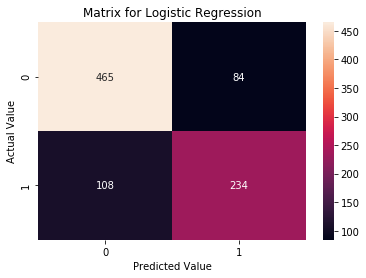

In [55]:
from sklearn.metrics import confusion_matrix #for confusion matrix

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(model,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

In [56]:
#fitting the model with scaled features
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X) #train features
y_train=y #train response
X_test = std_scaler.transform(test) #test features

model.fit(X_scaled, y_train)
y_pred=model.predict(X_test) #predicted test respons

In [92]:
submission = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
submission['Survived'] = y_pred
submission.Survived=subm.Survived.astype('int')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [94]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [96]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [97]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
